#### IMLA MINI PROJECT
    TITLE: CUSTOMER CHURN PREDICTION
    NAME:  Yash Mangukiya
    

In [82]:
# load the important libraries
import pandas as pd
import numpy as np

### Pre-Processing

In [83]:
# load the dataset
ds = pd.read_csv("churn.csv")

In [84]:
# show the first five entries of the dataset
ds.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [85]:
# to show the dimensions of the dataset (rows,cols)
ds.shape

(1199, 19)

In [86]:
# to show the datatypes of every column with its name
ds.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [87]:
# to check if there are any missing [null] values
ds.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [88]:
# drop the unimportant columns from the dataset
ds=ds.drop(["Phone","Account Length"],axis=1)

In [89]:
ds.shape

(1199, 17)

In [90]:
# use label encoder to encode categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds["Area Code"] = le.fit_transform(ds["Area Code"])
ds["Churn?"]=le.fit_transform(ds["Churn?"])
ds["Int'l Plan"]=le.fit_transform(ds["Int'l Plan"])
ds["State"] = le.fit_transform(ds["State"])


In [91]:
ds.head()

,State,Area Code,Int'l Plan,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,16,1,0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,1,0,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,0,1,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,1,1,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [92]:
# define the features and target variable
x=ds.iloc[:,3:-1]
y=ds.iloc[:,-1]
x.head()

,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [93]:
# to show the dimensions of features and target variable
print("Features Shape: ",x.shape)
print("Target Shape: ",y.shape)

Features Shape:  (1199, 13)
Target Shape:  (1199,)


### Splitting Data into test and train set

In [94]:
# split the data into 66 % training and 33 % testing set 
from sklearn.model_selection import train_test_split as tts
Xtrain,Xtest,Ytrain,Ytest=tts(x,y,test_size=0.33,random_state=0)

In [95]:
# to show the dimensions of training and testing set
print("Training Data Rows: ",Xtrain.shape)
print("Testing Data Rows: ",Xtest.shape)

Training Data Rows:  (803, 13)
Testing Data Rows:  (396, 13)


In [96]:
# use PCA to reduce Dimensionality of the features
# PCA converts set of correlated values to smaller set of un correlated values

from sklearn.decomposition import PCA
#load PCA into an object
pca=PCA(n_components=3)   
# fit the features of the training set
pca.fit(Xtrain) 


PCA(n_components=3)

In [97]:
#entire data can be regenerated using these components
pca.n_components_ 

3

In [98]:
print("Original number of Columns: ",Xtrain.shape[1])

# transform the training features
Xtrain=pca.transform(Xtrain)
# transform the testing features
Xtest=pca.transform(Xtest)

print("Reduced number of Columns: ",Xtrain.shape[1])


Original number of Columns:  13
Reduced number of Columns:  3


In [99]:
# values of training features after PCA
Xtrain

array([[  -5.6819314 ,   32.89778609,  -72.81449741],
       [ -35.61145729,   95.85502782,  -83.75377895],
       [ -98.71221926,  110.73619829,  -19.7577547 ],
       ...,
       [  57.95687384, -126.65326911, -105.39170529],
       [  94.97403461,   86.90109901,   37.72022027],
       [  70.90513995,  -53.69835317,   18.05994557]])

### Classification using Gaussian Naive Bayes Classifier

Accuracy:  90.15151515151516 %
Correct Predictions: 357/396


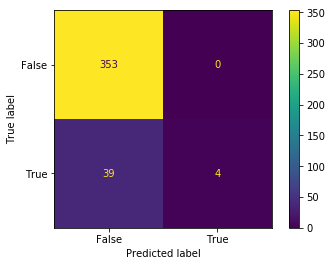

In [100]:
# load the libraries
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

#dictionary to store the accuracies of various classifiers
classifier_acc={}

# load the Naive Bayes Classifier in  an object
gnb=GaussianNB()

# train the classifier using training set
gnb.fit(Xtrain, Ytrain) 

# predict target variable of testing set
Ypred=gnb.predict(Xtest) 

# print accuracy in %
print("Accuracy: ",gnb.score(Xtest,Ytest)*100,"%") 
classifier_acc["GNB"]=gnb.score(Xtest,Ytest)*100
# print correct predictions
print("Correct Predictions: {}/{}".format(accuracy_score(Ytest,Ypred, normalize=False),Ytest.shape[0])) 

# plot the confusion matrix
plot_confusion_matrix(gnb, Xtest, Ytest,  display_labels=['False','True'])
plt.show() 

### Classification using k Nearest Neighbors Classifier

Accuracy:  90.15151515151516 %
Correct Predictions: 357/396


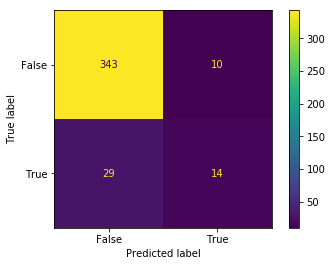

In [101]:
# import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# create object of kNN classifier with neighbors set to 3
knnclassifier3=KNeighborsClassifier(n_neighbors=3)

# train the classifier using training set
knnclassifier3.fit(Xtrain,Ytrain) 

# predict target variable of testing set
Ypred=knnclassifier3.predict(Xtest) 

# print accuracy in %
print("Accuracy: ",knnclassifier3.score(Xtest,Ytest)*100,"%")
classifier_acc["KNN3"]=knnclassifier3.score(Xtest,Ytest)*100
# print correct predictions
print("Correct Predictions: {}/{}".format(accuracy_score(Ytest,Ypred, normalize=False),Ytest.shape[0])) 

# plot the confusion matrix
plot_confusion_matrix(knnclassifier3, Xtest, Ytest,  display_labels=['False','True'])
plt.show() 

Accuracy:  90.9090909090909 %
Correct Predictions: 360/396


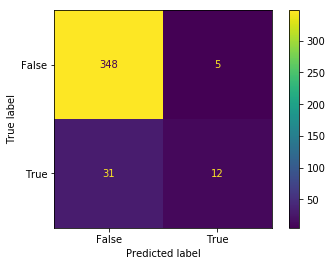

In [102]:
# create object of kNN classifier with neighbors set to 4
knnclassifier4=KNeighborsClassifier(n_neighbors=4)

# train the classifier using training set
knnclassifier4.fit(Xtrain,Ytrain) 

# predict target variable of testing set
Ypred=knnclassifier4.predict(Xtest) 

# print accuracy in %
print("Accuracy: ",knnclassifier4.score(Xtest,Ytest)*100,"%")
classifier_acc["KNN4"]=knnclassifier4.score(Xtest,Ytest)*100
# print correct predictions
print("Correct Predictions: {}/{}".format(accuracy_score(Ytest,Ypred, normalize=False),Ytest.shape[0])) 

# plot the confusion matrix
plot_confusion_matrix(knnclassifier4, Xtest, Ytest,  display_labels=['False','True'])
plt.show() 

### Classification using AdaBoost Classifier based on Ensemble Boosting Algorithm

Accuracy:  89.14141414141415 %
Correct Predictions: 360/396


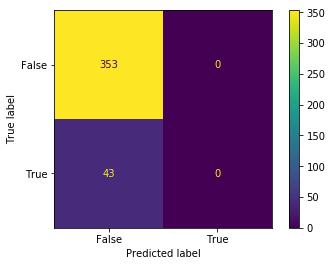

In [103]:
# load the libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

#create support vector classifier object
svc=SVC(probability=True, kernel='linear')

#create adaboost classifier object with number of times the model need to be trained
#choose the base estimator as svc
abc=AdaBoostClassifier(n_estimators=50,base_estimator=svc)

#train the classifier
abc.fit(Xtrain,Ytrain)

# predict targets of testing set
Ypred2=abc.predict(Xtest) 

# print accuracy in %
print("Accuracy: ",abc.score(Xtest,Ytest)*100,"%")
classifier_acc["ABC"]=abc.score(Xtest,Ytest)*100
# print correct predictions
print("Correct Predictions: {}/{}".format(accuracy_score(Ytest,Ypred, normalize=False),Ytest.shape[0])) 

# plot the confusion matrix
plot_confusion_matrix(abc, Xtest, Ytest,  display_labels=['False','True'])
plt.show() 

### Classification using Voting Classifier based on  Ensemble Bagging Algorithm

Accuracy:  91.41414141414141 %
Correct Predictions: 360/396


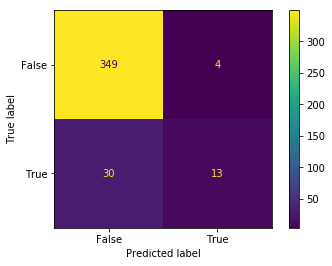

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# to reduce variance sveral estimators are used and then 
#take avearge of their predictions using bagging algorithm

estimators=[]

# kNN classifier with neighbors set to 3
model1 = KNeighborsClassifier(n_neighbors=3) 
estimators.append(('KNN',model1))

# decision tree classifier
model2 = DecisionTreeClassifier() 
estimators.append(('DTC',model2))

# support vector classifier
model3 = SVC() 
estimators.append(('SVM',model3))

# used to predict the target based on highest probability of being true
ensemble = VotingClassifier(estimators)

# train the model
eclf = ensemble.fit(Xtrain,Ytrain)

# predict target variable for test set
Ypred2=eclf.predict(Xtest) 

# print accuracy in %
print("Accuracy: ",eclf.score(Xtest,Ytest)*100,"%")
classifier_acc["VOTING"]=eclf.score(Xtest,Ytest)*100
# print correct predictions
print("Correct Predictions: {}/{}".format(accuracy_score(Ytest,Ypred, normalize=False),Ytest.shape[0])) 

# plot the confusion matrix
plot_confusion_matrix(eclf, Xtest, Ytest,  display_labels=['False','True'])
plt.show() 

### ACCURACY GRAPH OF ALL CLASSIFIERS

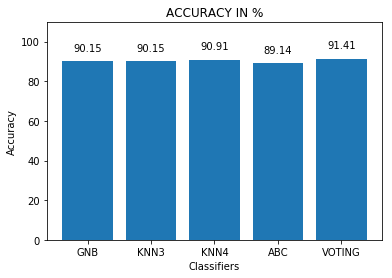

In [105]:
x=[]
y=[]
for i,j in classifier_acc.items():
    x.append(i)
    y.append(round(j,2))
    
# plot the bar chart
plt.bar(x,y)

#scale the y axis
plt.ylim(0,max(y)*1.2)

# zip joins x and y coordinates in pairs
for cx,cy in zip(x,y):

    plt.annotate(cy, # this is the text
                 (cx,cy), # this is the coordinates of the labels
                 textcoords="offset pixels", # the coordinate system of the offset may be pixels or points
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

#print the labels and axes labels
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('ACCURACY IN %')
plt.show()


### Clustering using K Means Clustering

In [106]:
ds.head()

,State,Area Code,Int'l Plan,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,16,1,0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,1,0,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,0,1,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,1,1,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [107]:
from sklearn.cluster import KMeans

# calculating the domestic charges of each customer
ds["Domestic Charge"] = ds["Day Charge"]+ds["Eve Charge"]+ds["Night Charge"] 

# storing charges of each active customer into a variable
data = ds[['Domestic Charge','Intl Charge']][ds["Churn?"] == 0] 

data.head()

,Domestic Charge,Intl Charge
0,72.86,2.70
1,55.54,3.70
2,59.00,3.29
3,65.02,1.78
4,49.36,2.73


Centroids: 
 [[66.3450152   2.68726444]
 [43.66047445  2.75510949]
 [55.86814318  2.75926174]]
Clusters: 
 [0 2 2 ... 2 0 1]


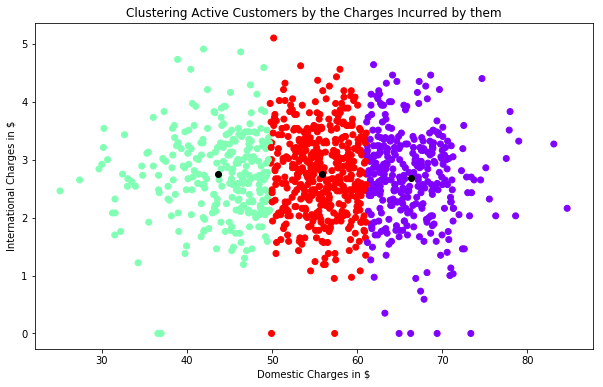

In [108]:
# fitting the data into k means with number of clusters set to 3
kmeans = KMeans(n_clusters = 3).fit(data)
# add a column in the data which contains the cluster the tuple belongs to
data['cluster'] = kmeans.labels_

# displays the centroids of the clusters
print("Centroids: \n",kmeans.cluster_centers_)
#displays which cluster the data points belong to
print("Clusters: \n",kmeans.labels_)

# to modify size of plot
plt.figure(figsize=(10,6)) 

# plot the data points
plt.scatter( data['Domestic Charge'], data['Intl Charge'],c = data['cluster'], cmap = 'rainbow') 

# plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black") 

# display the title of the plot
plt.title('Clustering Active Customers by the Charges Incurred by them') 
# display the x axis label
plt.xlabel('Domestic Charges in $') 
 # display the y axis label
plt.ylabel('International Charges in $')
plt.show()
